Team members:
    Ahmed Altowairqi
    Marwah Alkhalaf
    Mashael Alhassan
    Waad Alsaleh

# HR Analytics: Job Change of Data Scientists

'A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates'

• enrollee_id : Unique ID for candidate

• city: City code

• city_ development _index : Developement index of the city (scaled)

• gender: Gender of candidate

• relevent_experience: Relevant experience of candidate

•  enrolled_university: Type of University course enrolled if any

• education_level: Education level of candidate

• major_discipline :Education major discipline of candidate

• experience: Candidate total experience in years

• company_size: No of employees in current employer's company

• company_type : Type of current employer

• lastnewjob: Difference in years between previous job and current job

• training_hours: training hours completed

• target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

## Package Plan ##

  environment location: /Users/ahmadbasha/opt/anaconda3/envs/stack_3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge/label/gcc7
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:         145 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.5.25-~ --> conda-forge/label/gcc7::ca-certificates-2018.10.15-ha4d7672_0



ca-certificates-2018 | 135 KB    | #############################

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno
%matplotlib inline


import plotly.express as px
# from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

In [4]:
df= pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
df.shape

(19158, 14)

In [6]:
#Checking if there is any null values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
df.describe(exclude="number")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [9]:
#checking if there is any duplicates 
df.duplicated().sum()

0

<AxesSubplot:>

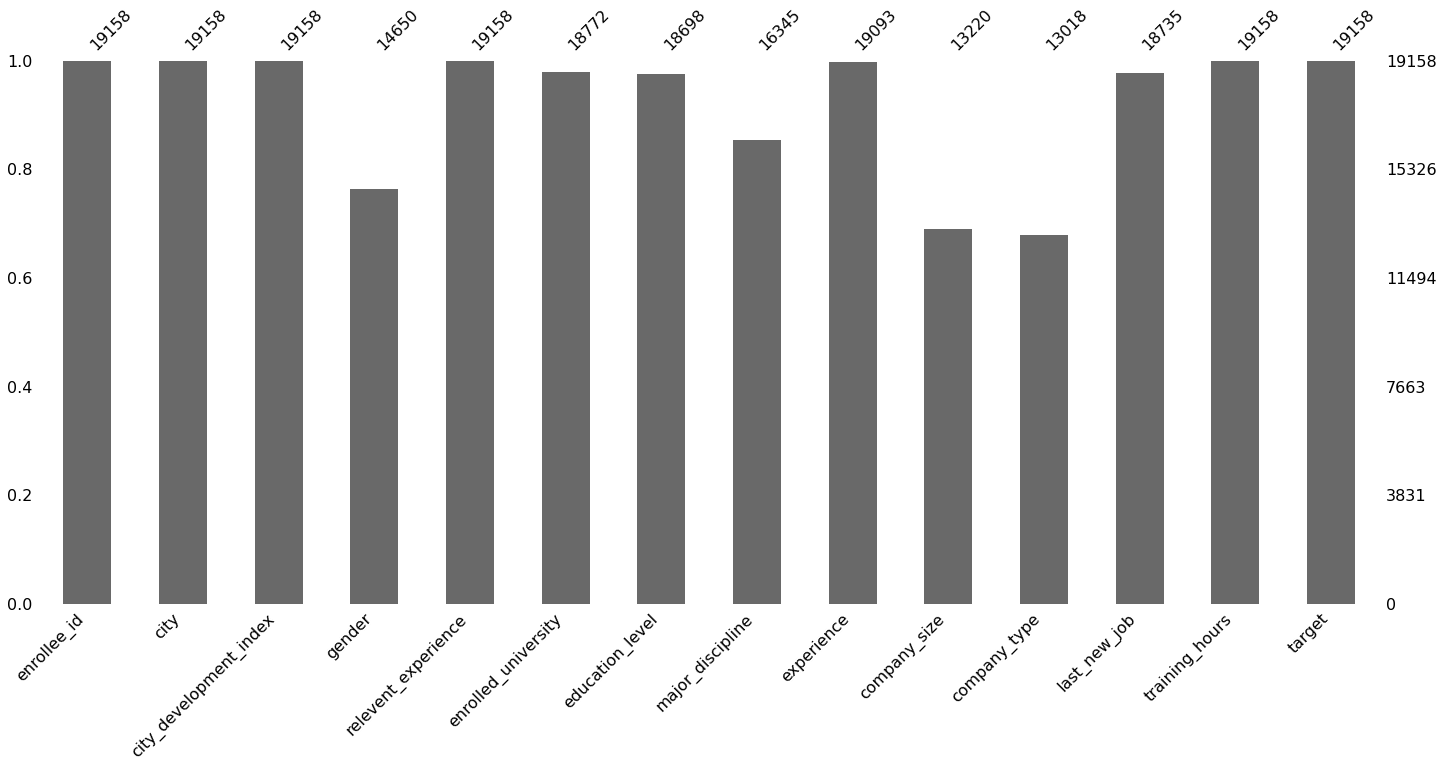

In [10]:
msno.bar(df)

In [11]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [12]:
#Filling in the NA value with forward fill 
df['gender']= df['gender'].ffill(axis = 0)

In [13]:
#We assume that 'Other' means that the person does not want to declare the gender
#we decided to replace it with the most occurance which is 'Male' 
df['gender']= df['gender'].replace('Other', 'Male')

In [14]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [15]:
#Filling in the data with the most common value
df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode().iloc[0])

In [16]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [17]:
#Filling in the data with the most common value
df['education_level'] = df['education_level'].fillna(df['education_level'].mode().iloc[0])

In [18]:
#Replacing 'Graduate' with 'Bachelor' 
df['education_level']= df['education_level'].replace('Graduate', 'Bachelor')

In [19]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [20]:
#Filling in the data with the most common value
df['major_discipline'] = df['major_discipline'].fillna(df['major_discipline'].mode().iloc[0])

In [21]:
#Filling in the data with the most common value
df['experience'] = df['experience'].fillna(df['experience'].mode().iloc[0])

In [22]:
#Filling in the NA value with forward fill
df['company_size']=df['company_size'].ffill(axis = 0)

In [23]:
#The first row was NA so we filled it with the most common value
df['company_size'] = df['company_size'].fillna(df['company_size'].mode().iloc[0])

In [24]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [25]:
#Filling in the NA value with forward fill
df['company_type']=df['company_type'].ffill(axis = 0)

In [26]:
#The first row was NA so we filled it with the most common value
df['company_type'] = df['company_type'].fillna(df['company_type'].mode().iloc[0])

In [27]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [28]:
#Filling in the data with the most common value
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode().iloc[0])

In [29]:
#Checking last time for any null values 
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [30]:
df.to_csv("new_data.csv")